In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams["patch.force_edgecolor"]=True

In [60]:
df1= pd.read_csv('brain1.csv')

In [61]:
df2= pd.read_csv('brain2.csv')

In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
subject ID    10 non-null int64
 age          10 non-null int64
 ethnicity    10 non-null object
 gender       10 non-null object
dtypes: int64(2), object(2)
memory usage: 400.0+ bytes


In [63]:
df2.head(10)

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M
5,5,24,Han Chinese,M
6,6,24,Han Chinese,M
7,7,25,Han Chinese,M
8,8,25,Han Chinese,M
9,9,24,Han Chinese,F


In [64]:
df2=pd.get_dummies(df2,'ethnicity','gender')

In [65]:
df2=df2.rename(columns={"subject ID": "SubjectID"})

In [66]:
df=df1.merge(df2,on='SubjectID')

In [67]:
df= df.rename(columns={"user-definedlabeln":"target"})


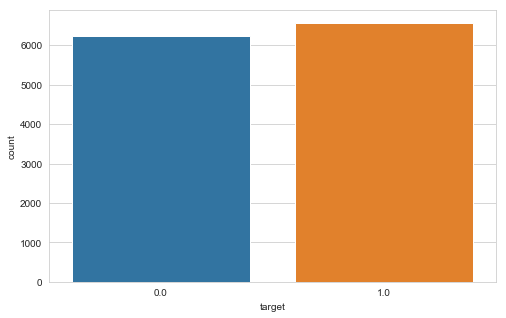

In [68]:
plt.figure(figsize=(8,5))
sns.countplot(df['target'])

In [69]:
df['target'].value_counts()

1.0    6567
0.0    6244
Name: target, dtype: int64

In [70]:
## Appears that we have a balanced target variable. Good for binary classification model. 
## No need for undersampling or oversampling.

In [71]:
df.describe()

,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,target,age,ethnicitygenderBengali,ethnicitygenderEnglish,ethnicitygenderHan Chinese,ethnicitygenderF,ethnicitygenderM
count,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000
mean,4.390602,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,3.814433e+04,2.959255e+04,1.441597e+04,0.479978,0.512606,25.409960,0.101085,0.100226,0.798689,0.200999,0.799001
std,2.913232,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,7.906606e+04,7.982637e+04,3.603523e+04,0.499618,0.499861,2.205148,0.301453,0.300313,0.400996,0.400763,0.400763
min,0.000000,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,7.358500e+03,4.058000e+03,2.167500e+03,0.000000,0.000000,24.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,4.000000,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,1.581000e+04,9.763000e+03,5.116000e+03,0.000000,1.000000,25.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,7.000000,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,3.549400e+04,2.488800e+04,1.266950e+04,1.000000,1.000000,25.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,9.000000,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,1.645369e+06,1.972506e+06,1.348117e+06,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000


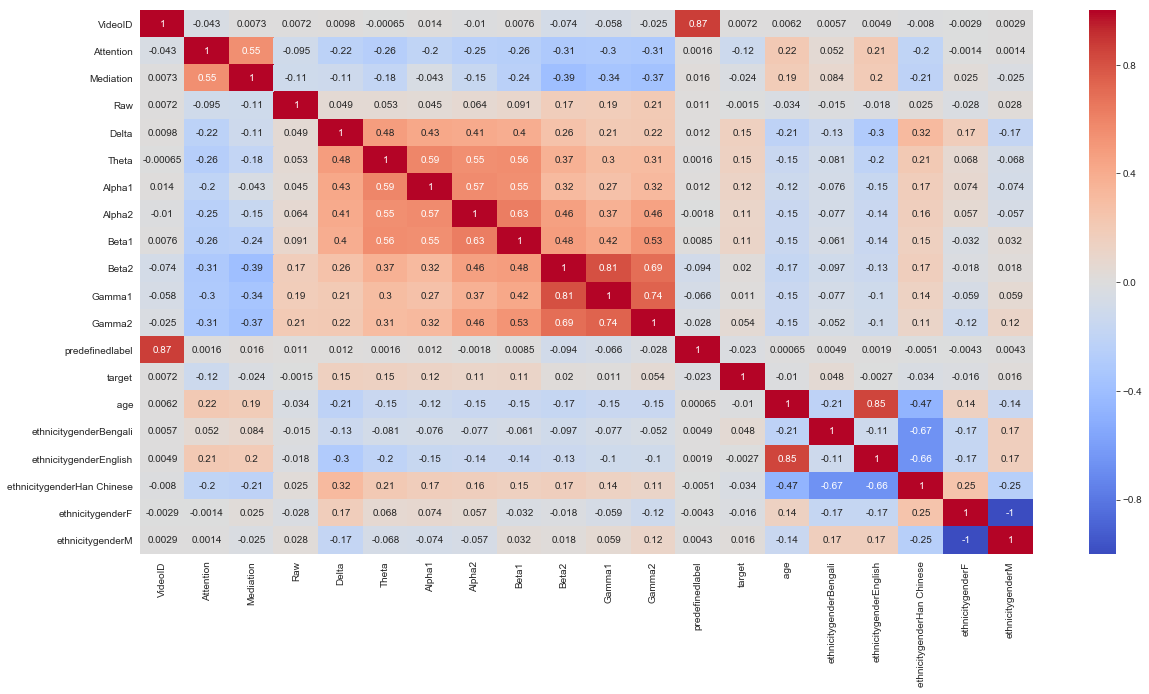

In [72]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [73]:
## Pearson correlation seems to be an ineffective means of feature selection. 

In [74]:
## lets try to find a baseline model from where we can begin improving it

In [75]:
X= df.drop(columns=['SubjectID','VideoID','target'],axis=1)

In [76]:
y= df['target']

In [77]:
from sklearn.model_selection import GridSearchCV
def best_machine(model, parameters, X, y):
    grid =  GridSearchCV(model, parameters, error_score=0.)
    grid.fit(X,y)
    print(grid.best_score_)
    print(grid.best_params_)
    print(round(grid.cv_results_['mean_fit_time'].mean(),3))
    print(round(grid.cv_results_['mean_score_time'].mean(),3))

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [79]:
lr_parameters= {'C':[0.01,1,10,100],'penalty':['l1','l2']}
knn_parameters= {'n_neighbors':[1,3,5,7,9]}
forest_parameters= {'n_estimators':[10,50,100],'max_depth':[None,1,3,5,7]}


In [80]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
forest=RandomForestClassifier()

In [81]:
best_machine(lr, lr_parameters, X, y)

0.5730231832019358
{'C': 1, 'penalty': 'l2'}
0.352
0.002


In [82]:
best_machine(knn, knn_parameters, X, y)

0.5315744282257435
{'n_neighbors': 9}
0.013
0.122


In [83]:
best_machine(forest, forest_parameters, X, y)

0.5772383108266333
{'max_depth': 1, 'n_estimators': 100}
0.597
0.026


In [84]:
## best accuracy on training set we have is .579 which is really bad.

In [85]:
from sklearn.svm import LinearSVC

In [86]:
svc = LinearSVC()

In [87]:
svc_parameters= {'penalty':['l1','l2'],
                'dual':[True,False]}

In [88]:
best_machine(svc, svc_parameters, X, y)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
/Applications/anaconda3/lib/python3.

0.5773944266645851
{'dual': False, 'penalty': 'l2'}
0.415
0.001


In [89]:
## score not any better.

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [92]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost
from xgboost import XGBClassifier

In [93]:
xg = xgboost.XGBClassifier()
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [94]:
prediction = xg.predict(X_test)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [95]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

        0.0       0.68      0.65      0.66      2073
        1.0       0.68      0.71      0.69      2155

avg / total       0.68      0.68      0.68      4228



In [97]:
## 68 is new baseline accuracy

In [98]:
## Dimensionality reduction might help our accuracy with Xgboost

In [99]:
from sklearn.decomposition import KernelPCA

In [ ]:
pca= KernelPCA(n_components=10,kernel='rbf')

In [ ]:
x_pca=pca.fit_transform(X)

In [ ]:
x_pca.shape

In [ ]:
df_X=pd.DataFrame(x_pca ,columns=['1','2','3','4','5','6','7','8','9','10'])

In [ ]:
X=df_X
y=df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
xg = xgboost.XGBClassifier()
xg.fit(X_train, y_train)

In [ ]:
prediction1 = xg.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction1))

In [ ]:
## accuracy went down by 2 % . dimensionality reduction using Kernel PCA has not helped our model.
## Baseline stays at 68%